# Переход от задачи регрессии к задаче классификации

**Задание:** Построить регрессионную модель спрогнозировать число сданных в аренду велосипедов (см. файл DataSet5_2.csv) с использованием множественной регресии. 

Ввести граничное значение (экономически выгодное значение числа сданных в аренду) для велосипедов и ввести дополнительную колонку (колонку класса) означающую эффективность или нет (1 или 0). 

Построить модель классификации для предсказания дней эффективной работы. Сравнить качество моделей предсказания дней эффективной работы (модели регрессии и классификации)

In [1]:
# данные тут https://disk.yandex.ru/d/GqGh2GMLEkl2Aw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data_path = "C:/Users/Анна/Desktop/ML занятия/HSE ML/HSE ML/DataSets"
# данные о работе пункта проката велосипедов
df = pd.read_csv(data_path + "/DataSet5_2.csv")
df

,count,holiday,humidity,registered,summer,temp,windspeed,workingday
0,2,0,81,2,0,10.66,22.0028,1
1,157,0,54,150,1,18.04,16.9979,1
2,233,0,40,199,1,37.72,15.0013,1
3,98,0,88,86,1,22.14,19.0012,1
4,6,0,74,6,0,6.56,6.0032,1
...,...,...,...,...,...,...,...,...
2995,232,0,78,192,1,26.24,7.0015,1
2996,63,0,71,56,0,14.76,0.0000,0
2997,145,0,26,142,0,11.48,8.9981,1
2998,203,0,52,173,1,22.14,0.0000,1


Построим модель нелинейной регрессии на наших данных.

ВАЖНО: в данном случае мы строим регресссионную модель для *описания* наших данных, а не для задачи прогноза. Поэтому мы НЕ делим данные на тренировочную и тестовую выборки.

In [2]:
import numpy as np
from scipy.optimize import curve_fit
# Use non-linear least squares to fit a function, f, to data.

# Определение функции для нелинейной регрессии
def nonlinear_regression(x, a, b, c, d, e, f, g):
    return a + b * x['holiday'] + c * x['humidity'] + d * x['summer'] + e * x['temp'] + f * x['windspeed'] + g * x['workingday']

# Применение нелинейной регрессии к данным
params, _ = curve_fit(nonlinear_regression, df[['holiday', 'humidity', 'summer', 'temp', 'windspeed', 'workingday']], df['count'], p0=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

# Получение коэффициентов
a, b, c, d, e, f, g = params



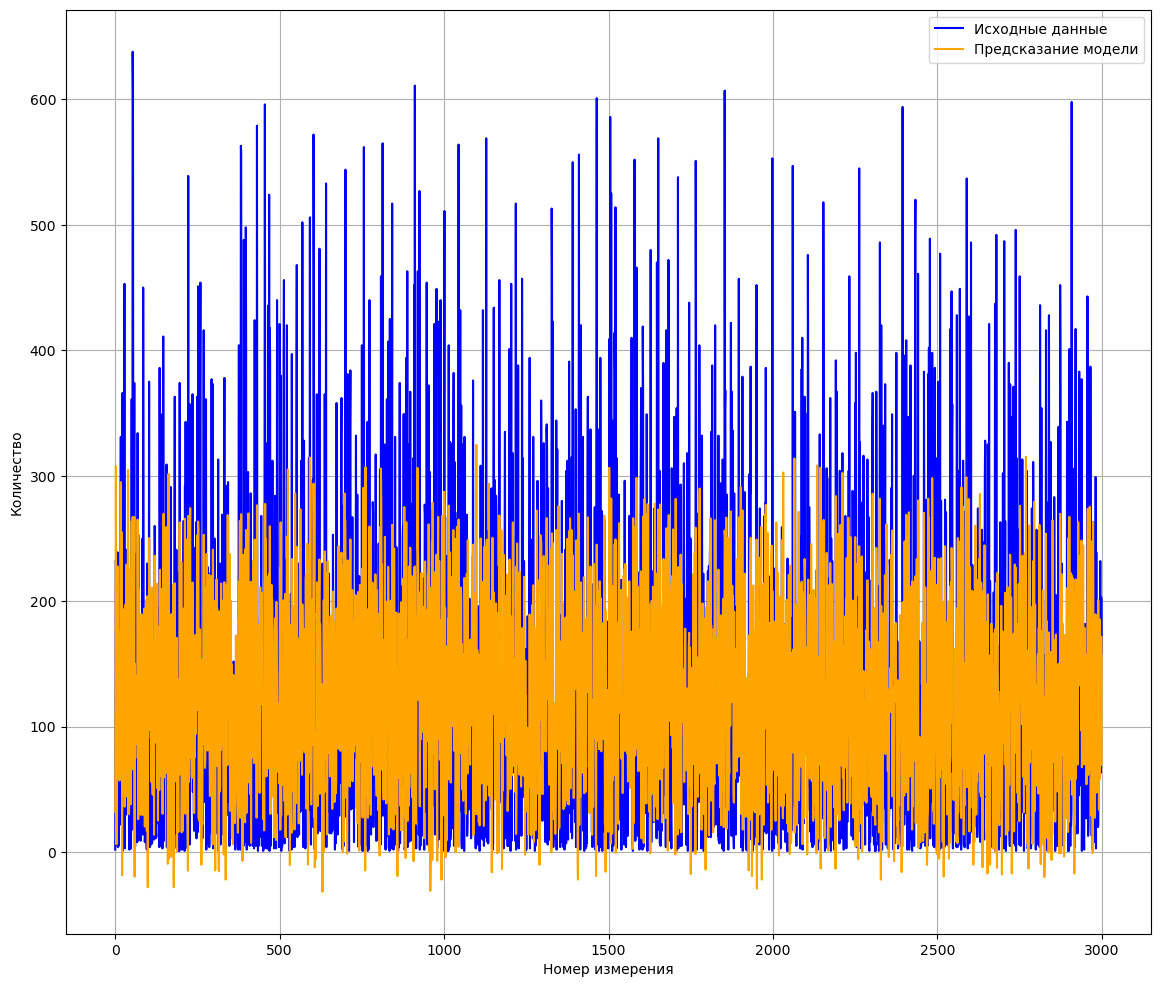

In [3]:
# Строим прогноз с использованием полученных коэффициентов
fcast = (
    a +
    b * df['holiday'] +
    c * df['humidity'] +
    d * df['summer'] +
    e * df['temp'] +
    f * df['windspeed'] +
    g * df['workingday']
)

plt.figure(figsize=(14, 12))
plt.plot(df['count'], color="blue", label='Исходные данные') 
plt.plot(fcast, color='orange', label='Предсказание модели')
plt.grid()
plt.xlabel("Номер измерения")
plt.ylabel("Количество")
plt.legend()
plt.show()

Отсортируем данные и посмотрим на результаты

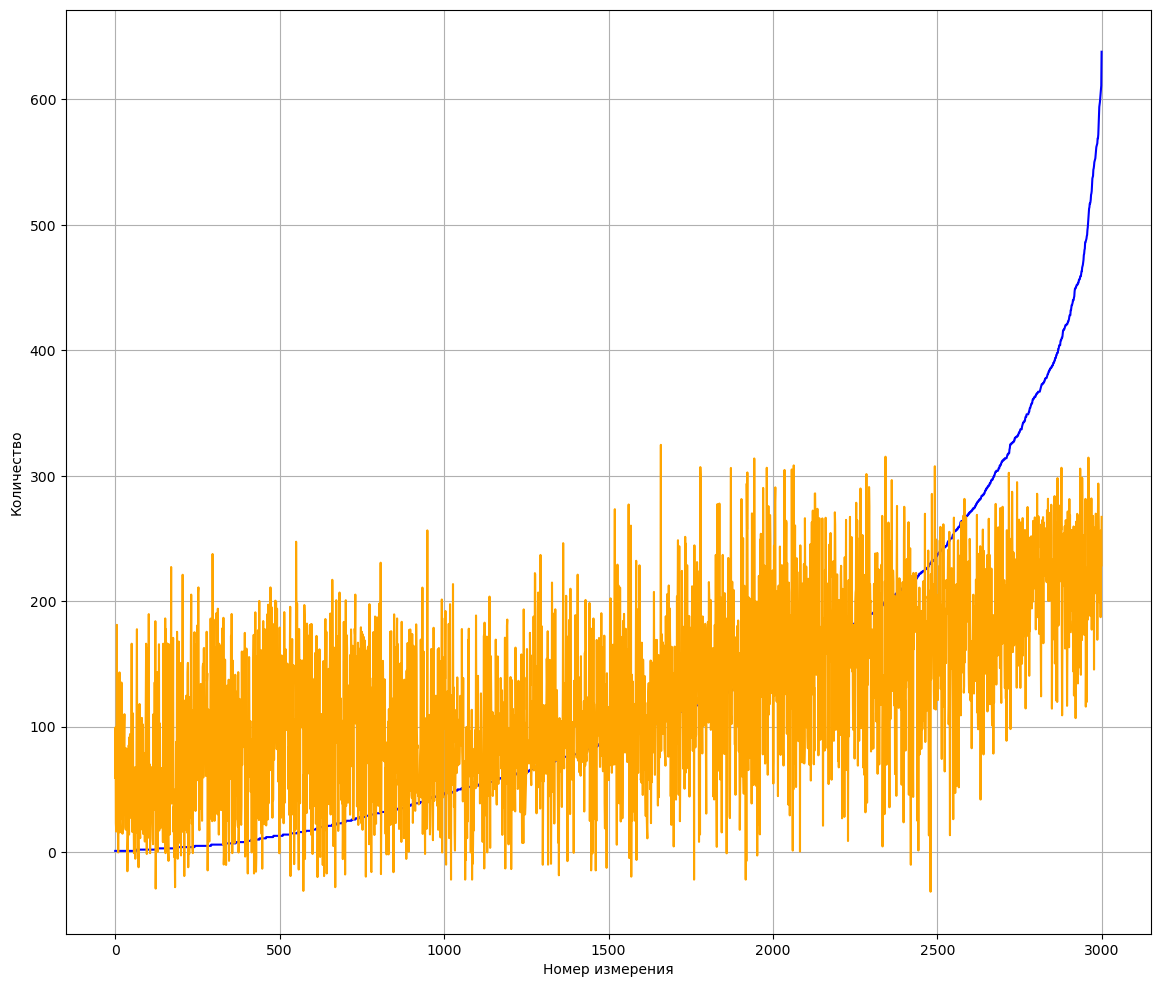

In [4]:
df2 = df.sort_values(by='count').reset_index()

fcast2 = (
    a +
    b * df2['holiday'] +
    c * df2['humidity'] +
    d * df2['summer'] +
    e * df2['temp'] +
    f * df2['windspeed'] +
    g * df2['workingday']
)

plt.figure(figsize=(14, 12))
plt.plot(df2['count'], color="blue")
plt.plot(fcast2, color='orange')
plt.grid()
plt.xlabel("Номер измерения")
plt.ylabel("Количество")
plt.show()

От задачи регрессии перейдём к задаче классификации. 

Будем классифицировать по колонке "count", в которой содержится информация о количестве сданных в аренду велосипедов в текущий день. Выделим пороговое значение, по которому будем считать, были ли день удачным (мы сдали в аренду много велосипедов, класс "1") или неудачным (класс 0). 

Пусть это будет значение в 100 велосипедов.

In [5]:
y_test = df['count'].where(df['count']>100, 1)
y_test = y_test.where(df['count']<100, 0)

y_pred = fcast.where(fcast>100, 1)
y_pred = y_pred.where(fcast<100, 0)
y_pred = y_pred.astype('int64')
# y_pred.unique()

Для оценки качества предсказаний моделей мы сначала построим матрицу ошибок (confusion matrix).

Матрица ошибок – это показатель успешности классификации, где классов два или более. Это таблица с 4 различными комбинациями сочетаний прогнозируемых и фактических значений.

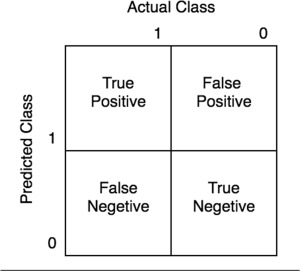


Для понимания, воспользуемся "беременной" аналогией:

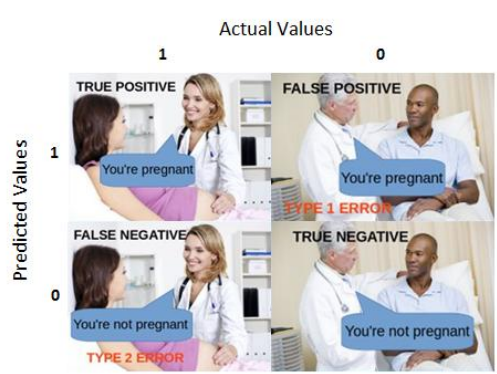

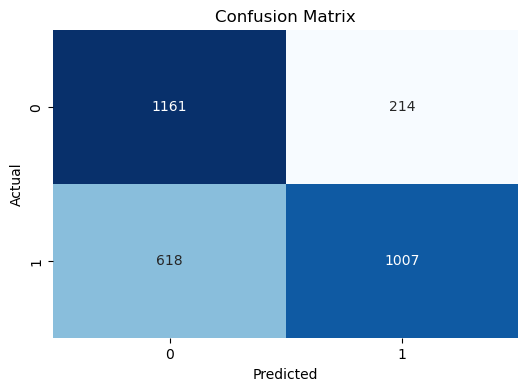

In [6]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Исходя из полученных значений посчитаем следующие метрики:

- **Accuracy**

Одной из наиболее простых, а поэтому и распространенной метрикой является accuracy (!доля правильных ответов)

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

- **Precision**

Точность, показывает количество истинно положительных исходов из всего набора положительных меток и считается по следующей формуле:

$Precision = \frac{TP}{TP + FP}$

- **Recall**

В русском языке для этого термина используется слово «полнота» или «чувствительность». Эта метрика определяет количество истинно положительных среди всех меток класса, которые были определены как «положительный» и вычисляется по следующей формуле:

$Recall = \frac{TP}{TP+FN}$

- **F-мера** (англ. F-score)

Precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок.

Понятно что чем выше точность и полнота, тем лучше. Но в реальной жизни максимальная точность и полнота не достижимы одновременно и приходится искать некий баланс. Поэтому, хотелось бы иметь некую метрику которая объединяла в себе информацию о точности и полноте нашего алгоритма. В этом случае нам будет проще принимать решение о том какую реализацию запускать в производство (у кого больше тот и круче). Именно такой метрикой является F-мера.

F₁-мера — среднее гармоническое между precision и recall:

$F_1 = (\frac{precision^{-1}+recall^{-1}}{2})^{-1} = 2* \frac{precision * recall}{precision + recall}$

Среднее гармоническое взвешенное $F_β$ (F1-мера — частный случай $F_β$-меры для $β = 1$). $F_β$ измеряет эффективность классификатора учитывая recall в $β$ раз более важным чем precision:

$F_β = (1+β^2) \frac{precision * recall}{β^2 * precision + recall}$


- **Logistic Loss**

Особняком стоит логистическая функция потерь, определяемая как:

$logloss = - \frac{1}{l} \sum_{i=1}^l(y_i*log(\hat{y_i})+(1-y_i)*log(1- \hat{y_i}))$

здесь $\hat y$ — это ответ алгоритма на $i$-ом объекте, $y$ — истинная метка класса на $i$-ом объекте, а $l$ размер выборки.

Данная метрика нечасто выступает в бизнес-требованиях, но часто — в задачах на kaggle.
Интуитивно можно представить минимизацию logloss как задачу максимизации accuracy путем штрафа за неверные предсказания. Однако необходимо отметить, что logloss крайне сильно штрафует за уверенность классификатора в неверном ответе.

Чем ниже значение log loss, тем точнее прогнозирование — в идеальной модели значение log loss было бы равно 0.


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

#Рассчитать долю правильных ответов
accuracy = accuracy_score(y_pred=y_pred, y_true=y_test)

# Рассчитать точность (precision)
precision = precision_score(y_pred=y_pred, y_true=y_test)

# Рассчитать полноту (recall)
recall = recall_score(y_pred=y_pred, y_true=y_test)

# Рассчитать F-меру (F-measure)
F_measure = f1_score(y_pred=y_pred, y_true=y_test)

# Рассчитать Log loss
Log_loss = log_loss(y_pred=y_pred, y_true=y_test)


print(f'''Accuracy: {accuracy:.2f}
Precision: {precision:.2f}
Recall: {recall:.2f}
F1: {F_measure:.2f}
Log loss: {Log_loss:.2f}''')

Accuracy: 0.72
Precision: 0.82
Recall: 0.62
F1: 0.71
Log loss: 10.00


#### ROC-кривая

**ROC-кривая** (англ. receiver operating characteristic, рабочая характеристика приёмника) — график, позволяющий *оценить качество бинарной классификации*, отображает соотношение между долей объектов от общего количества носителей признака, верно классифицированных как несущие признак (англ. true positive rate, TPR, называемой чувствительностью алгоритма классификации), и долей объектов от общего количества объектов, не несущих признака, ошибочно классифицированных как несущие признак (англ. false positive rate, FPR, величина 1-FPR называется специфичностью алгоритма классификации) при варьировании порога решающего правила.

Также известна как **кривая ошибок**. Анализ классификаций с применением ROC-кривых называется ROC-анализом.

*Источник Википедия https://ru.wikipedia.org/wiki/ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F*

Вариант, как понять ROC-кривую: она описывает взаимосвязь между чувствительностью модели (TPR, или true positives rate — доля истинно положительных примеров) и её специфичностью (описываемой в отношении долей ложноположительных результатов: 1-FPR).

$ TPR = \frac{TP}{P}$, где $P$ - это все положительные результаты, а $TP$ - истинно положительные результаты.

$ FPR = \frac{FP}{N}$, где $N$ - это все негативные результаты, а $FP$ - ложноположительные результаты.

**Обобщая**: вы сравниваете, как чувствительность модели меняется по отношению к ложно положительным долям на разных порогах отсечения. Модель опирается на порог отсечения, чтобы принимать решения по входным данным и относить их к положительным.

*Использованы материалы https://habr.com/ru/companies/netologyru/articles/582756/*

**Площадь под кривой (AUC = Area Under Curve)** — это более сложная метрика точности, которая помогает понять, насколько детерминирована модель. Она описывает, насколько хорошо модель прогнозирует положительный класс, когда фактический результат является положительным.


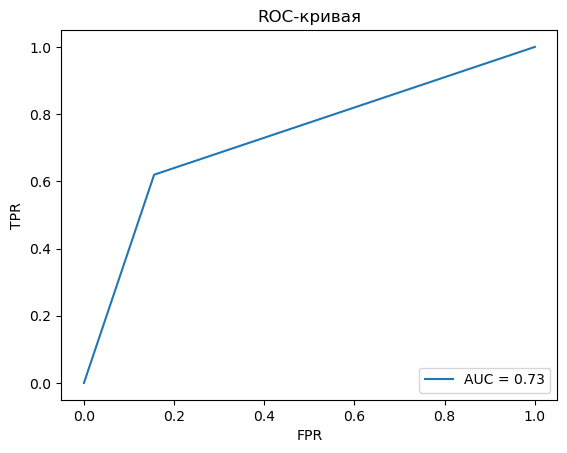

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Рассчитать ROC-кривую
fpr, tpr, thresholds = roc_curve( y_test, y_pred)

# Рассчитать площадь под ROC-кривой (AUC-ROC)
roc_auc = roc_auc_score( y_test, y_pred)

# Визуализировать ROC-кривую
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
# plt.plot(fpr, color='darkorange')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

Сравним полученные результаты с работой классификатора. Используем KNN классификацию.

Для дальнейшей работы добавим колонку "class" в наш датафрейм.

In [9]:
clss = df['count'].where(df['count']>100, 1)
clss = clss.where(df['count']<100, 0)
# clss.unique()
df['class'] = clss
df

,count,holiday,humidity,registered,summer,temp,windspeed,workingday,class
0,2,0,81,2,0,10.66,22.0028,1,1
1,157,0,54,150,1,18.04,16.9979,1,0
2,233,0,40,199,1,37.72,15.0013,1,0
3,98,0,88,86,1,22.14,19.0012,1,1
4,6,0,74,6,0,6.56,6.0032,1,1
...,...,...,...,...,...,...,...,...,...
2995,232,0,78,192,1,26.24,7.0015,1,0
2996,63,0,71,56,0,14.76,0.0000,0,1
2997,145,0,26,142,0,11.48,8.9981,1,0
2998,203,0,52,173,1,22.14,0.0000,1,0


In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Разделяем данные на обучающий и тестовый наборы
X = df[['holiday', 'humidity', 'summer', 'temp', 'windspeed', 'workingday']]
y = df['class']


# Создаем и обучаем модель k-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)  # Здесь 3 - это количество соседей, можно выбрать другое значение
knn_model.fit(X, y)

# Предсказание классов для данных
clss2 = knn_model.predict(X)

# Предсказание вероятностей классов для данных
clss3 = knn_model.predict_proba(X)

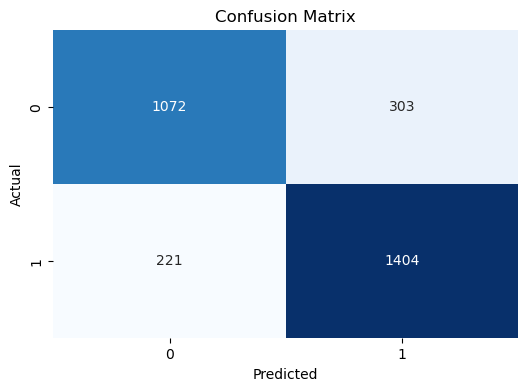

In [17]:
conf_matrix = confusion_matrix(y, clss2)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
#Рассчитать долю правильных ответов
accuracy = accuracy_score(y, clss2)

# Рассчитать точность (precision)
precision = precision_score(y, clss2)

# Рассчитать полноту (recall)
recall = recall_score(y, clss2)

# Рассчитать F-меру (F-measure)
F_measure = f1_score(y, clss2)

# Рассчитать Log loss
Log_loss = log_loss(y_pred=y, y_true=clss2)


print(f'''Accuracy: {accuracy:.2f}
Precision: {precision:.2f}
Recall: {recall:.2f}
F1: {F_measure:.2f}
Log loss: {Log_loss:.2f}''')

Accuracy: 0.83
Precision: 0.82
Recall: 0.86
F1: 0.84
Log loss: 6.30


In [20]:
# кроме этого, для упрощения кода, можно воспользоваться функцией classification_report, 
# которая сразу посчитает нам все необходимые метрики

from sklearn.metrics import classification_report
print(classification_report(y, clss2))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1375
           1       0.82      0.86      0.84      1625

    accuracy                           0.83      3000
   macro avg       0.83      0.82      0.82      3000
weighted avg       0.83      0.83      0.82      3000



Как интерпретировать classification_report:

Мы получаем сводку precision, recall и f1-меру для каждого класса.

Support в данном контексте - это количество элементов каждого класса в тестовой выборке.

Также мы видим accuracy (долю правильных ответов) и общий объём тестовой выбоки.

Также мы видим macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label)

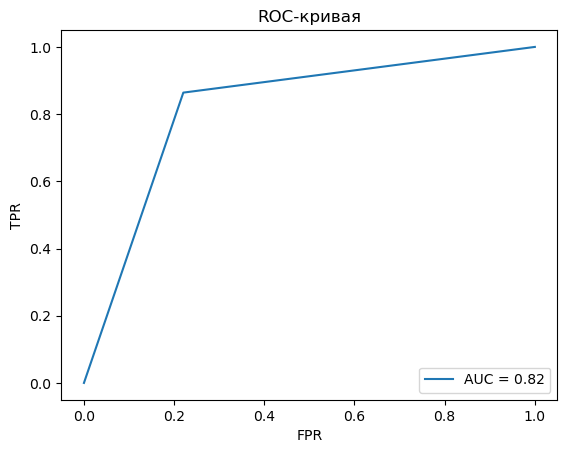

In [21]:
# Рассчитать ROC-кривую
fpr, tpr, thresholds = roc_curve(y, clss2)

# Рассчитать площадь под ROC-кривой (AUC-ROC)
roc_auc = roc_auc_score(y, clss2)

# Визуализировать ROC-кривую
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
# plt.plot(fpr, color='darkorange')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()